In [1]:
!sudo pip install -r requirements2.txt

In [2]:
# K-Nearest Neighbors를 위한 라이브러리 import

import sklearn
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('selected.csv')
X = data.drop(['FINALDIAGNOSIS','DRINK','SMOKE'], axis = 1)
y = data['FINALDIAGNOSIS']

In [4]:
X

,AGE,EDUCATION,CHARACTER1,CHARACTER2,CHARACTER3,CHARACTER6,CHARACTER7,CHARACTER9,CHARACTER13,CHARACTER14,...,BODYMEAS_8HAND4,BODYMEAS_8HAND5,BODYMEAS_8HAND6,BODYMEAS_8HAND7,BODYMEAS_8HAND8,SYSTOLICBP,DIASTOLICBP,GLUCOSE,TG,HDL_CHOL
0,48.666,5,2,2,1,1,1.0,2,2,1,...,96.0,89.0,82.0,91.0,96.0,120,80,104.0,72.0,60.0
1,80.773,3,1,1,1,1,1.0,1,1,1,...,101.0,93.0,92.0,96.0,99.0,124,65,110.0,97.0,46.0
2,50.008,3,3,1,1,1,1.0,1,1,1,...,90.0,83.0,80.0,81.0,81.0,121,75,79.0,88.0,49.0
3,50.551,4,1,1,1,1,1.0,1,1,1,...,104.0,90.0,91.0,94.0,99.0,113,81,100.0,136.0,44.0
4,49.581,2,3,2,3,3,2.0,2,2,2,...,102.0,99.0,98.0,98.0,100.0,129,72,92.0,61.0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,50.682,5,3,1,2,2,2.0,2,3,2,...,86.5,83.2,74.5,80.0,88.0,120,80,71.0,75.0,73.0
496,42.542,5,3,1,3,3,3.0,3,3,2,...,76.0,67.0,64.5,76.0,79.0,110,70,74.0,86.0,104.0
497,48.797,5,3,2,2,2,3.0,2,2,2,...,104.0,99.7,95.0,96.5,97.5,150,100,125.0,220.0,74.0
498,51.263,4,3,2,1,1,1.0,1,2,3,...,94.0,87.0,86.0,89.5,91.4,110,80,85.0,127.0,49.0


In [5]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [6]:
x_shuffled = sklearn.utils.shuffle(train_X, random_state=312)
y_shuffled = sklearn.utils.shuffle(train_y, random_state=312)

smote = SMOTE(random_state=312)
train_X, train_y = smote.fit_resample(x_shuffled, y_shuffled)

In [7]:
n_neighbors = 16
model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [8]:
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=16)

Accuracy: 0.520
Recall Score: 0.520
Precision Score: 0.538
F1 Score: 0.507


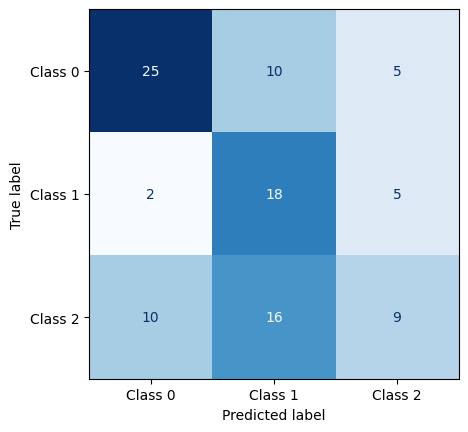

In [9]:
pred = model.predict(test_X)
acc = accuracy_score(test_y, pred)
recall = recall_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass

print(f'Accuracy: {acc:.3f}')
print(f'Recall Score: {recall:.3f}')
print(f'Precision Score: {precision:.3f}')
print(f'F1 Score: {f1:.3f}')

# 세 개 클래스에 라벨 부여 ('Class 0', 'Class 1', 'Class 2')
class_labels = ['Class 0', 'Class 1', 'Class 2']
cm = confusion_matrix(test_y, pred)

# confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', colorbar=False)

In [10]:
acc_list = []
prec_list = []
recall_list = []
f1_list = []

for i in range(1, 50):
    n_neighbors = i
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(train_X, train_y)

    pred = model.predict(test_X)
    acc = accuracy_score(test_y, pred)
    recall = recall_score(test_y, pred, average='weighted') 
    precision = precision_score(test_y, pred, average='weighted') 
    f1 = f1_score(test_y, pred, average='weighted')  


    acc_list.append(acc)
    recall_list.append(recall)
    prec_list.append(precision)
    f1_list.append(f1)

In [11]:
metrics = {
    'Accuracy': acc_list,
    'Precision':prec_list,
    'Recall': recall_list,
    'F1': f1_list,
}
comparison_table = pd.DataFrame(metrics, index=np.arange(1, 50))
comparison_table

,Accuracy,Precision,Recall,F1
1,0.44,0.443485,0.44,0.441496
2,0.43,0.411422,0.43,0.404425
3,0.41,0.411081,0.41,0.410107
4,0.48,0.482261,0.48,0.475724
5,0.46,0.458114,0.46,0.454972
6,0.49,0.488284,0.49,0.483956
7,0.47,0.465528,0.47,0.459434
8,0.45,0.441057,0.45,0.438742
9,0.47,0.473009,0.47,0.461579
10,0.46,0.453469,0.46,0.444939


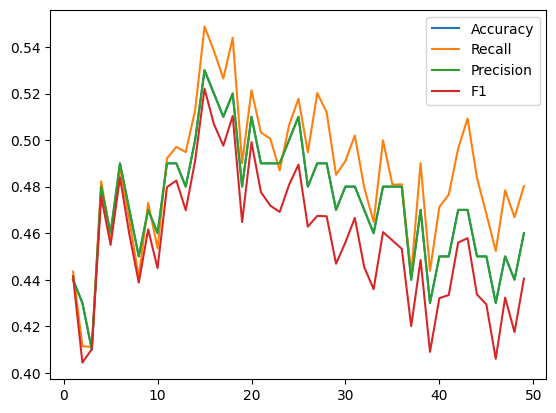

In [12]:
plt.plot(comparison_table)
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1']);

# KNN + PCA

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from factor_analyzer import FactorAnalyzer

# 필요한 패키지/모듈 가져오기
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [14]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index = X.index)

In [15]:
data_scale.cov()

,AGE,EDUCATION,CHARACTER1,CHARACTER2,CHARACTER3,CHARACTER6,CHARACTER7,CHARACTER9,CHARACTER13,CHARACTER14,...,BODYMEAS_8HAND4,BODYMEAS_8HAND5,BODYMEAS_8HAND6,BODYMEAS_8HAND7,BODYMEAS_8HAND8,SYSTOLICBP,DIASTOLICBP,GLUCOSE,TG,HDL_CHOL
AGE,1.002004,-0.407221,-0.062063,-0.135522,-0.154116,0.025638,-0.006004,-0.069564,0.013895,0.044497,...,0.442184,0.484368,0.474118,0.405239,0.218685,0.308980,0.249220,0.312656,0.336133,-0.192519
EDUCATION,-0.407221,1.002004,0.147949,0.050541,0.109447,0.036312,0.037556,0.082757,-0.000457,-0.067743,...,-0.154878,-0.203911,-0.243038,-0.175628,-0.043300,-0.117779,-0.036866,-0.193230,-0.187127,0.167293
CHARACTER1,-0.062063,0.147949,1.002004,0.243977,0.286933,0.371840,0.373838,0.335744,0.262116,0.017602,...,-0.105335,-0.095781,-0.138519,-0.124206,-0.127262,-0.067013,0.002385,-0.085919,-0.078426,0.113499
CHARACTER2,-0.135522,0.050541,0.243977,1.002004,0.417755,0.230605,0.308928,0.253101,0.196488,0.163991,...,-0.099564,-0.064228,-0.059527,-0.055806,-0.003969,-0.066884,0.015636,-0.040564,-0.063838,-0.017686
CHARACTER3,-0.154116,0.109447,0.286933,0.417755,1.002004,0.386548,0.463764,0.372391,0.389793,0.029985,...,-0.176902,-0.206416,-0.205614,-0.151822,-0.140711,-0.140800,-0.088925,-0.133232,-0.118575,0.101585
CHARACTER6,0.025638,0.036312,0.371840,0.230605,0.386548,1.002004,0.561236,0.381232,0.447106,0.155159,...,-0.087716,-0.048545,-0.080230,-0.092305,-0.116714,-0.018180,0.048662,-0.021477,-0.039224,-0.073763
CHARACTER7,-0.006004,0.037556,0.373838,0.308928,0.463764,0.561236,1.002004,0.362955,0.439720,0.102764,...,-0.059513,-0.038317,-0.061510,-0.081825,-0.080932,-0.021179,-0.017684,0.007906,-0.009293,0.006630
CHARACTER9,-0.069564,0.082757,0.335744,0.253101,0.372391,0.381232,0.362955,1.002004,0.267951,0.090605,...,-0.258904,-0.300531,-0.268269,-0.180983,-0.187096,-0.168804,-0.132341,-0.082232,-0.169327,0.145571
CHARACTER13,0.013895,-0.000457,0.262116,0.196488,0.389793,0.447106,0.439720,0.267951,1.002004,0.162554,...,-0.070446,-0.036385,-0.043867,-0.075757,-0.064163,-0.004725,0.033236,0.003237,-0.067897,0.029482
CHARACTER14,0.044497,-0.067743,0.017602,0.163991,0.029985,0.155159,0.102764,0.090605,0.162554,1.002004,...,0.111239,0.116461,0.092839,0.092851,0.093087,0.100098,0.080790,-0.026347,0.058063,-0.069912


In [16]:
# PCA 진행 (고유 분해를 통해 고유값과 고유 벡터 계산)
pca = PCA(random_state=312)
X_p = pca.fit_transform(data_scale)

## PC 개수

In [17]:
# Eigen value
fa = FactorAnalyzer(n_factors=data_scale.shape[1], rotation=None) # rotation:
fa.fit(data_scale)

ev, v = fa.get_eigenvalues()
print('eigen value:', ev,'\n', "number of eigen value:", len(ev))

print('적합한 PC 개수:', sum(ev >= 1))

eigen value: [9.40165233 3.3861849  2.88753621 2.37363913 1.51175352 1.38946393
 1.26336155 1.13333378 1.07858915 1.03823107 0.94118532 0.93012604
 0.89358753 0.79127427 0.72844425 0.67646885 0.60586762 0.57897282
 0.55675573 0.53558392 0.51248294 0.46898525 0.42181984 0.41611897
 0.40211589 0.34740474 0.2864293  0.26826679 0.22906155 0.21650021
 0.21516587 0.14346977 0.08512754 0.07803936 0.07468762 0.0698541
 0.06245832] 
 number of eigen value: 37
적합한 PC 개수: 10


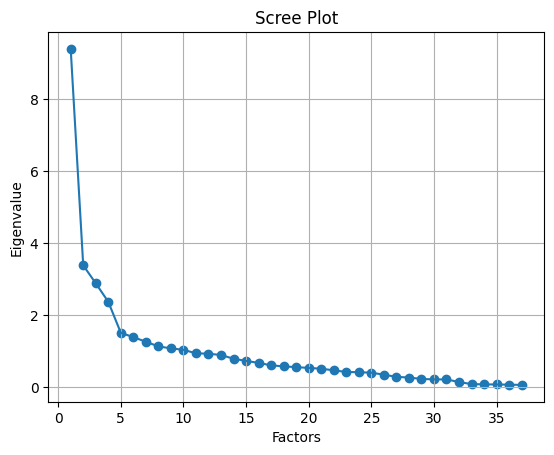

In [18]:
# 시각화 1
plt.scatter(range(1, data_scale.shape[1]+1),ev)
plt.plot(range(1,data_scale.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [19]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.25409871 0.09151851 0.07804152 0.06415241 0.0408582  0.03755308
 0.03414491 0.03063064 0.02915106 0.0280603  0.02543744 0.02513854
 0.02415101 0.02138579 0.01968768 0.01828294 0.0163748  0.01564791
 0.01504745 0.01447524 0.01385089 0.01267528 0.01140054 0.01124646
 0.010868   0.00938932 0.00774133 0.00725045 0.00619085 0.00585136
 0.00581529 0.00387756 0.00230074 0.00210917 0.00201858 0.00188795
 0.00168806]
누적 분산 설명 비율:
 [0.25409871 0.34561722 0.42365874 0.48781115 0.52866935 0.56622243
 0.60036734 0.63099798 0.66014904 0.68820934 0.71364678 0.73878532
 0.76293634 0.78432213 0.80400981 0.82229275 0.83866755 0.85431547
 0.86936292 0.88383816 0.89768905 0.91036433 0.92176486 0.93301132
 0.94387932 0.95326864 0.96100997 0.96826042 0.97445128 0.98030263
 0.98611793 0.98999549 0.99229623 0.9944054  0.99642399 0.99831194
 1.        ]


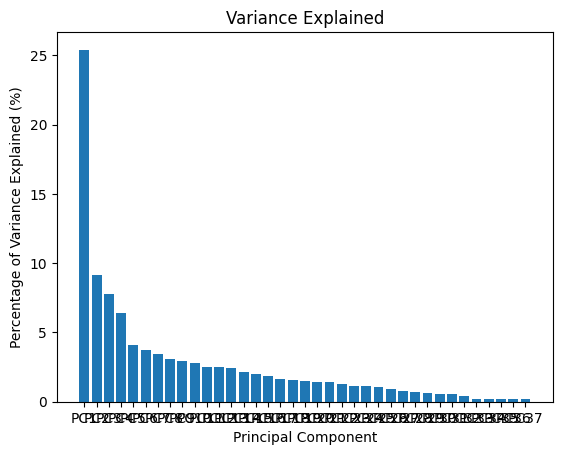

In [20]:
# 시각화 2
percent_variance = np.round(each_variance_ratio* 100, decimals =2)
columns = []
for i in range(len(percent_variance)):
    columns.append(f'PC{i+1}')

ax = plt.bar(x = range(len(percent_variance)), height=percent_variance, tick_label=columns)
plt.ylabel('Percentage of Variance Explained (%)')
plt.xlabel('Principal Component')
plt.title('Variance Explained')
plt.show()

In [21]:
# 분산 설명 비율
each_variance_ratio = pca.explained_variance_ratio_
print('분산 설명 비율:\n', each_variance_ratio) # 각 PC별 분산 설명 비율

cumsum = np.cumsum(each_variance_ratio)
print('누적 분산 설명 비율:\n', cumsum) # 고유값을 기준으로 설명 가능한 분산 (누적)

분산 설명 비율:
 [0.25409871 0.09151851 0.07804152 0.06415241 0.0408582  0.03755308
 0.03414491 0.03063064 0.02915106 0.0280603  0.02543744 0.02513854
 0.02415101 0.02138579 0.01968768 0.01828294 0.0163748  0.01564791
 0.01504745 0.01447524 0.01385089 0.01267528 0.01140054 0.01124646
 0.010868   0.00938932 0.00774133 0.00725045 0.00619085 0.00585136
 0.00581529 0.00387756 0.00230074 0.00210917 0.00201858 0.00188795
 0.00168806]
누적 분산 설명 비율:
 [0.25409871 0.34561722 0.42365874 0.48781115 0.52866935 0.56622243
 0.60036734 0.63099798 0.66014904 0.68820934 0.71364678 0.73878532
 0.76293634 0.78432213 0.80400981 0.82229275 0.83866755 0.85431547
 0.86936292 0.88383816 0.89768905 0.91036433 0.92176486 0.93301132
 0.94387932 0.95326864 0.96100997 0.96826042 0.97445128 0.98030263
 0.98611793 0.98999549 0.99229623 0.9944054  0.99642399 0.99831194
 1.        ]


In [22]:
d = np.argmax(cumsum >= 0.80) +1 #누적된 설명가능한 분산의 비율이 0.80 이상
print('적합한 PC 개수:', d) 

적합한 PC 개수: 15


## PCA

In [23]:
# PCA 진행
pca = PCA(n_components=d,random_state=312) # n_components를 재설정
pca_out = pca.fit(data_scale)
X_p = pca.fit_transform(data_scale)

In [24]:
pca_result = pd.DataFrame(pca.components_.T,
             columns = [f'PC{i}' for i in range(d)],
             index=X.columns)

In [25]:
np.cumsum(pca.explained_variance_ratio_)

array([0.25409871, 0.34561722, 0.42365874, 0.48781115, 0.52866935,
       0.56622243, 0.60036734, 0.63099798, 0.66014904, 0.68820934,
       0.71364678, 0.73878532, 0.76293634, 0.78432213, 0.80400981])

In [26]:
import pandas as pd

# Provided PCA coefficients
pca_coefficients = {}
for i in range(d):
    pca_coefficients[f'PC{i}'] = pca_result[f'PC{i}']

# Calculate PCA components for all examples in the DataFrame X
def calculate_pca_components_for_dataframe(df):
    pca_components_list = []
    for index, row in df.iterrows():
        pca_components = {}
        for pc in pca_coefficients.keys():
            pca_value = sum([row[feature] * pca_coefficients[pc][index] for index, feature in enumerate(df.columns)])
            pca_components[pc] = pca_value
        pca_components_list.append(pca_components)
    return pd.DataFrame(pca_components_list)

# Calculate PCA components for all examples in DataFrame X
pca_components_df = calculate_pca_components_for_dataframe(X)

pca_components_df

,PC0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
0,-237.745184,-94.592008,-28.116916,-16.789193,2.176456,34.953076,88.624697,-36.882782,51.303975,4.217045,20.805760,49.271046,-2.763311,58.038836,39.961704
1,-261.329006,-103.242420,-34.625276,-30.557873,-7.158628,31.935358,71.664074,-28.333769,55.015689,-2.099041,19.570668,45.647357,9.148572,65.351533,40.820274
2,-232.257455,-91.044864,-24.973369,-15.387523,14.746423,30.837054,76.063899,-20.896779,53.243769,-5.231041,12.926144,38.523000,6.255342,57.905205,36.208213
3,-267.091613,-100.270349,-29.283245,-19.225482,0.297863,35.715615,65.676028,-11.549151,61.531612,-5.504689,1.351058,44.800517,22.684800,78.034358,41.540218
4,-262.935166,-106.227740,-27.991550,-5.783761,7.755305,30.451924,79.495711,-25.954843,48.446620,2.812927,21.386844,44.666454,-6.020085,51.143096,33.886077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-221.980369,-91.835973,-24.365038,-9.114581,15.297867,26.887518,91.097365,-33.412618,50.384399,-2.724579,21.994533,38.605246,-0.705895,53.434874,36.995532
496,-189.206062,-81.097693,-22.366217,-11.625391,4.284231,28.115651,91.961946,-42.030972,52.772717,-3.308277,23.255891,37.898573,-0.219152,54.446121,42.245011
497,-294.395124,-108.410106,-28.125458,-47.217965,9.914564,53.583306,79.543128,-4.270872,83.412555,-9.274723,-15.641246,50.869674,45.521312,120.303705,57.943448
498,-249.970066,-96.336212,-26.286065,-18.951135,5.703226,30.369091,67.747374,-12.408518,58.785526,-6.275651,3.757532,39.211886,21.729272,71.541331,40.638277


## KNN

In [27]:
X = pca_components_df
y = data['FINALDIAGNOSIS']

In [28]:
# 열별로 scaling (z-standardization)
from sklearn.preprocessing import StandardScaler
data_scale = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns, index = X.index)

In [29]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify = y)

In [30]:
x_shuffled = sklearn.utils.shuffle(train_X, random_state=312)
y_shuffled = sklearn.utils.shuffle(train_y, random_state=312)

smote = SMOTE(random_state=312)
train_X, train_y = smote.fit_resample(x_shuffled, y_shuffled)

In [31]:
n_neighbors = 16
model = KNeighborsClassifier(n_neighbors=n_neighbors)

In [32]:
model.fit(train_X, train_y)

KNeighborsClassifier(n_neighbors=16)

Accuracy: 0.510
Recall Score: 0.510
Precision Score: 0.508
F1 Score: 0.501


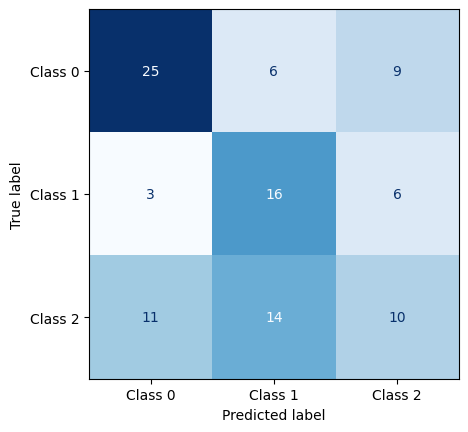

In [33]:
pred = model.predict(test_X)
acc = accuracy_score(test_y, pred)
recall = recall_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass
precision = precision_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass
f1 = f1_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass

print(f'Accuracy: {acc:.3f}')
print(f'Recall Score: {recall:.3f}')
print(f'Precision Score: {precision:.3f}')
print(f'F1 Score: {f1:.3f}')

# Provide labels for all three classes ('Class 0', 'Class 1', 'Class 2')
class_labels = ['Class 0', 'Class 1', 'Class 2']
cm = confusion_matrix(test_y, pred)

# Display confusion matrix with appropriate class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap='Blues', colorbar=False)

In [34]:
acc_list = []
prec_list = []
recall_list = []
f1_list = []

for i in range(1, 50):
    n_neighbors = i
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(train_X, train_y)

    pred = model.predict(test_X)
    acc = accuracy_score(test_y, pred)
    recall = recall_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass
    precision = precision_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass
    f1 = f1_score(test_y, pred, average='weighted')  # Use 'weighted' for multiclass


    acc_list.append(acc)
    recall_list.append(recall)
    prec_list.append(precision)
    f1_list.append(f1)

In [35]:
metrics = {
    'Accuracy': acc_list,
    'Precision':prec_list,
    'Recall': recall_list,
    'F1': f1_list,
}
comparison_table = pd.DataFrame(metrics, index=np.arange(1, 50))
comparison_table

,Accuracy,Precision,Recall,F1
1,0.46,0.468571,0.46,0.462667
2,0.49,0.493093,0.49,0.468027
3,0.45,0.443609,0.45,0.445986
4,0.48,0.490515,0.48,0.468001
5,0.47,0.465065,0.47,0.457653
6,0.50,0.498040,0.50,0.493833
7,0.51,0.511820,0.51,0.503531
8,0.50,0.494665,0.50,0.490113
9,0.49,0.486577,0.49,0.481115
10,0.49,0.487926,0.49,0.484384


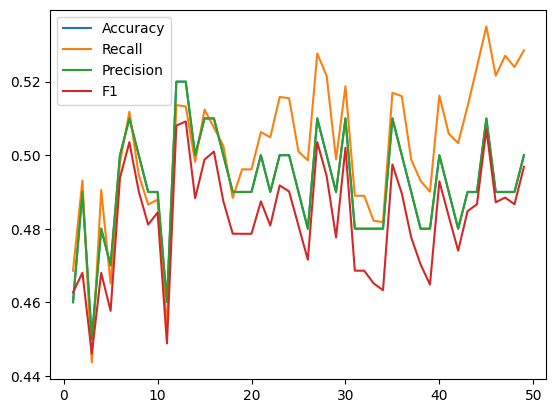

In [36]:
plt.plot(comparison_table)
plt.legend(['Accuracy', 'Recall', 'Precision', 'F1']);